In [2]:
# Importing python liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# uploading csv data
df= pd.read_csv("Zomato data .csv")

In [9]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

# Convert the data type of column "rate"

In [10]:
def handleRate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)
df["rate"]= df["rate"].apply(handleRate)
print(df.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

   rate  votes  approx_cost(for two people) listed_in(type)  
0   4.1    775                          800          Buffet  
1   4.1    787   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Types of Restaurent')

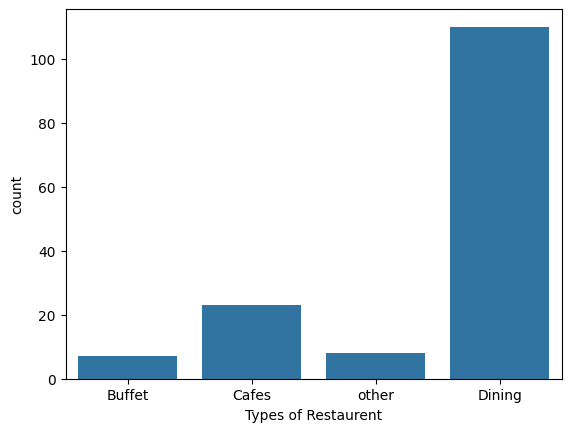

In [12]:
# What types of resturant do the majority of customer order from?
sns.countplot(x="listed_in(type)", data=df)
plt.xlabel("Types of Restaurent")

# Conclusion: Majority of the restaurent fall in dining category

<Axes: xlabel='listed_in(type)', ylabel='votes'>

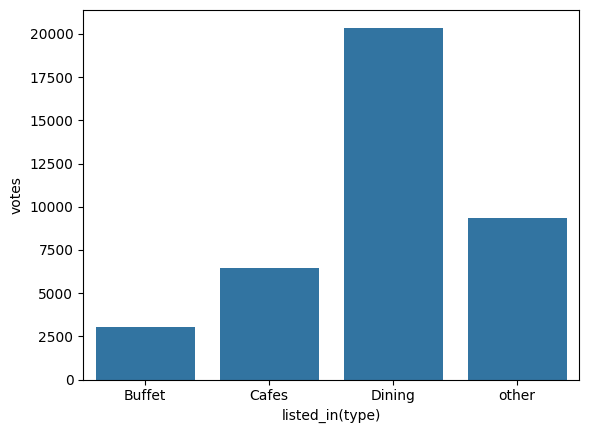

In [22]:
# How many votes has each types of resaurent received from customers?
vote_count= df.groupby(["listed_in(type)"], as_index=False)["votes"].sum()
sns.barplot(x="listed_in(type)", y="votes", data=vote_count)

# Conclusion: Dinning reastaurents have received maximum votes

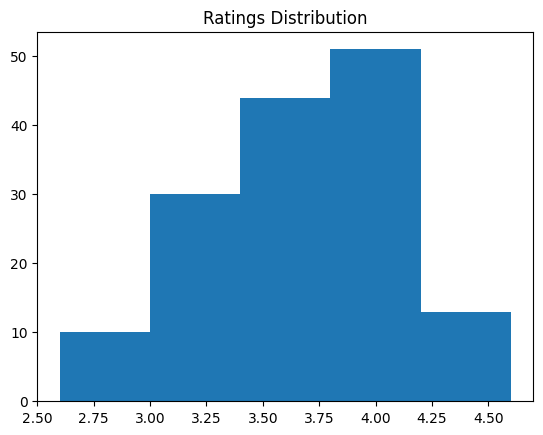

In [29]:
# What are the ratings that the majority of the restaurent have received?
plt.hist(df["rate"], bins=5)
plt.title("Ratings Distribution")
plt.show()

# Conclusion: Mojority restaurants received 3.5 to 4 ratings

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

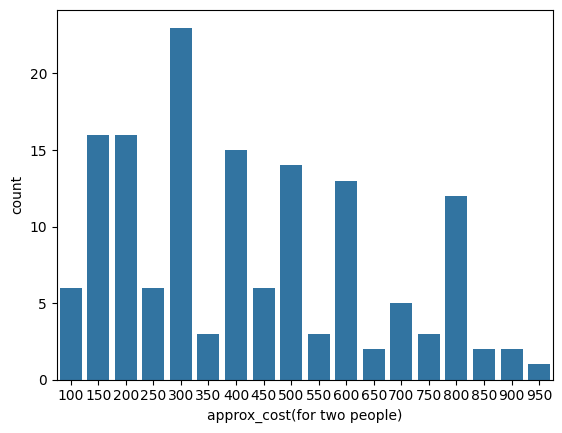

In [32]:
# Zomato has observed that most couples order most of their food online. What is their average spending on each order?
sns.countplot(x="approx_cost(for two people)", data=df)


# Conclusion: Majority of the couples prefer restaurant with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

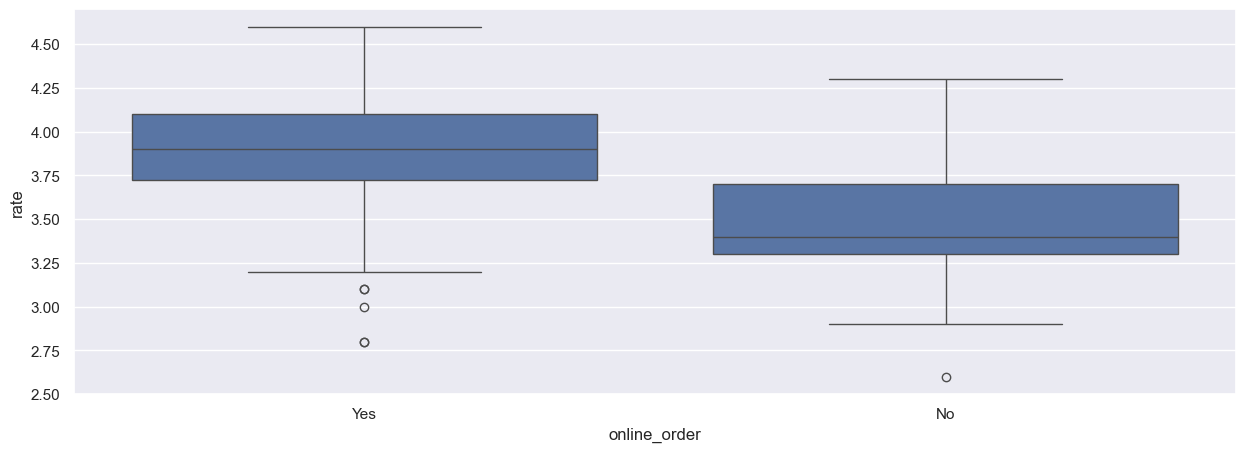

In [39]:
# Which mode (online/ offline) has received the maximum ratings?
sns.boxplot(x= "online_order", y= "rate", data=df)


# Conclusion: Offline order received lower rating in comparision to online order

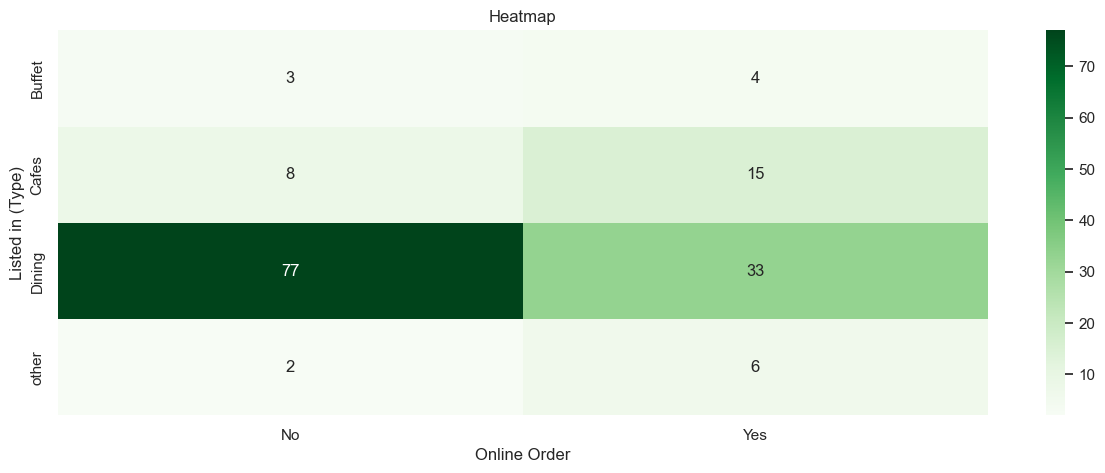

In [42]:
# Which types of restaurent received more offline orders, so that zomato can provide these customers woth some good offers?
pivot_table = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="Greens", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

# Conclusion: Dinning restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.